In [1]:
from glob import glob

from cv2 import imread
import numpy as np
from PIL import Image
import tensorflow as tf

2022-11-14 21:30:54.389745: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-14 21:30:54.500135: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-14 21:30:55.023995: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/z/.local/lib/python3.8/site-packages/cv2/../../lib64:
2022-11-14 21:30:55.024044: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dle

In [4]:
model_path = "../OUT/v2.1/model/20221114-213533_mobileNet.h5"
interpreter = tf.lite.Interpreter(model_path)
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()


ValueError: Model provided has model identifier '

', should be 'TFL3'


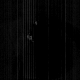

In [21]:
# Test the model on random input data.
# input_shape = input_details[0]['shape']
# input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
data_full_path = f"/media/z/0/MVPC10/DATA/03_PROCESSED"
data_list = glob(f"{data_full_path}/*png")
data = data_list[10000]

img = Image.open(data)  # .resize((80,80))
display(img)

In [30]:
img_arr = np.array(img, dtype=np.float32)
img_arr /= 255

input_data = img_arr.reshape(1, img_arr.shape[0], img_arr.shape[1], 1)

interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data[0,0,0,0])

1.6295189
